# Tutorial

```self.clean(self, inputs, data=None, **kwargs)```

This is a tutorial for the 'clean' method, a necessary step for ensuring FoKL may process almost any dataset. In the
following script, it will be shown how 'clean' may be used to automatically format and normalize a raw dataset, only format, or normalize to a wider range of values which is most useful for applications in the 'update' method.

In [1]:
import os
import sys
sys.path.append(os.path.join('..', '..'))
from src.FoKL import FoKLRoutines
import numpy as np


# Example dataset:
inputs = [np.linspace(0, 10, 100), 10 * np.random.rand(100)]
data = inputs[0] ** 2 + inputs[1]

# Initialize FoKL class object:
model = FoKLRoutines.FoKL(UserWarnings=True)

## Standard Use

(ignore ```_setattr=True```; this may be left out when using ```clean```)

If the raw dataset is thought to be complete, without new data expected, but most importantly without new input variable mininma or maxima expected, 'clean' only needs to be called once.

To train on the entire dataset,

In [2]:
model.clean(inputs, data, _setattr=True)

print(model.minmax)
print([[np.min(model.inputs[:, 0]), np.max(model.inputs[:, 0])], [np.min(model.inputs[:, 1]), np.max(model.inputs[:, 1])]])

[[0.0, 10.0], [0.028279949384651948, 9.946409936284095]]
[[0.0, 1.0], [0.0, 1.0]]


/home/jacobpatrick/FoKL-GPy-decouple_clean/docs/tutorials/../../src/FoKL/FoKLRoutines.py:284: UserWarning: 'inputs' was transposed. Ignore if more datapoints than input variables, else set 'AutoTranspose=False' to disable.
  warnings.warn("'inputs' was transposed. Ignore if more datapoints than input variables, else set "


To train on a percentage (i.e., (0, 1) fraction) of the dataset selected randomly,

In [3]:
_ = model.clean(inputs, data, train=0.8, _setattr=True)

## Anticipating New Data

If it is expected that future evaluations of the model will be done at inputs beyond what the training set contains, the normalization [min, max] bounds may be expanded in a couple ways.

Most simply, [min, max] may be specified.

In [4]:
model.clean(inputs, data, minmax=[[-1, 12], [0, 10]], _setattr=True)  # expand bounds of first input variable

print(model.minmax)
print([[np.min(model.inputs[:, 0]), np.max(model.inputs[:, 0])], [np.min(model.inputs[:, 1]), np.max(model.inputs[:, 1])]])

[[-1.0, 12.0], [0.0, 10.0]]
[[0.07692307692307693, 0.8461538461538461], [0.002827994938465195, 0.9946409936284095]]


/home/jacobpatrick/FoKL-GPy-decouple_clean/docs/tutorials/../../src/FoKL/FoKLRoutines.py:420: UserWarning: The model already contains normalization [min, max] bounds, so the currently trained model will not be valid for the new bounds requested. Train a new model with these new bounds.
  warnings.warn("The model already contains normalization [min, max] bounds, so the currently trained model will not be valid for the new bounds requested. Train a new model with these new bounds.", category=UserWarning)


A pillow buffer may also be specified. The pillow may either be as a percent of the max-min span (default),

In [5]:
model.clean(inputs, data, pillow=[[0.1, 0.2], [0, 0]], _setattr=True)  # 10% of span added below min; 20% of span added above max

print(model.minmax)
print([[np.min(model.inputs[:, 0]), np.max(model.inputs[:, 0])], [np.min(model.inputs[:, 1]), np.max(model.inputs[:, 1])]])

[[-2.3, 14.6], [0.0, 10.0]]
[[0.13609467455621302, 0.727810650887574], [0.002827994938465195, 0.9946409936284095]]


Or, the pillow may be the values to which [min, max] will map when placed on a 0-1 scale by setting ```pillow_type='absolute'```, with the upper value being the distance less than 1,

In [6]:
model.clean(inputs, data, pillow=[[0.1, 0.2], [0, 0]], pillow_type='absolute', _setattr=True)  # inputs map to [0.1, 0.8] 

print(model.minmax)
print([[np.min(model.inputs[:, 0]), np.max(model.inputs[:, 0])], [np.min(model.inputs[:, 1]), np.max(model.inputs[:, 1])]])

[[-4.7142857142857135, 19.428571428571423], [0.0, 10.0]]
[[0.1952662721893491, 0.6094674556213019], [0.002827994938465195, 0.9946409936284095]]


## New Data

Often it is the case that new data must be formatted and normalized according to the previous [min, max] bounds. To achieve this,

In [7]:
model.clean([[0.4, 8.7, 4.3], [4.2, 6, 8.5]], _setattr=True)

print(model.inputs)

[[0.21183432 0.42      ]
 [0.5556213  0.6       ]
 [0.37337278 0.85      ]]


Or, if normalization has already been applied to the new data somehow and all that is desired is the automatic formatting,

In [8]:
model.clean([[0.4, 8.7, 4.3], [4.2, 6, 8.5]], normalize=False, _setattr=True)

print(model.inputs)

[[0.4 4.2]
 [8.7 6. ]
 [4.3 8.5]]


## Use in fit and evaluate

To use ```clean``` in ```fit``` and ```evaluate```, simply pass keywords into the function arguments.

/home/jacobpatrick/FoKL-GPy-decouple_clean/docs/tutorials/../../src/FoKL/FoKLRoutines.py:284: UserWarning: 'inputs' was transposed. Ignore if more datapoints than input variables, else set 'AutoTranspose=False' to disable.
  warnings.warn("'inputs' was transposed. Ignore if more datapoints than input variables, else set "


[1, 517.2962613585723]
[2, 513.400295931022]
[2, -349.20957870031134]
[3, -353.7462951654631]
[3, -648.8048087345135]
[4, -648.8048087345135]
[4, -656.9031636640946]
[4, -1123.566859351993]
[5, -1123.566859351993]
[5, -1130.7140307091477]
[5, -1374.2943883371308]
[6, -1374.2943883371308]
[6, -1374.2943883371308]
[6, -1377.818573002142]
[6, -1499.689386512853]
[7, -1499.689386512853]
[7, -1499.689386512853]
[7, -1470.0842624949985]


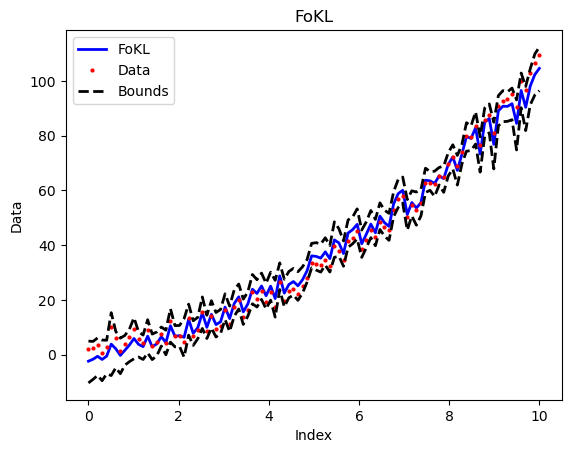

[ 0.59518657 79.98824564 29.37430204]


In [10]:
model.fit(inputs, data, clean=True, pillow=[[0.1, 0.2], [0, 0]], pillow_type='absolute')
model.coverage3(plot=True, xaxis=0)  # validation plot

print(model.evaluate([[0.4, 8.7, 4.3], [4.2, 6, 8.5]], clean=True))